In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time as time

In [2]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [14]:
# disable Certificate issue on Mac
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
lfw['data'].shape

(1140, 1850)

In [5]:
lfw['images'].shape

(1140, 50, 37)

In [6]:
lfw['images'][-1:,-1:]

array([[[  9.333333 ,  12.       ,  15.333333 ,  13.666667 ,
          13.333333 ,  18.       ,  74.333336 , 167.33333  ,
         179.66667  , 184.33333  , 163.66667  , 115.333336 ,
         133.33333  , 114.666664 ,  85.666664 ,  65.666664 ,
          62.       ,  62.666668 ,  63.       ,  58.       ,
          49.666668 ,  44.333332 ,  28.666666 ,  18.       ,
          13.666667 ,  10.333333 ,   8.       ,   7.3333335,
           7.6666665,   6.6666665,   6.3333335,   6.6666665,
           5.3333335,   8.333333 ,  17.666666 ,  29.666666 ,
          28.333334 ]]], dtype=float32)

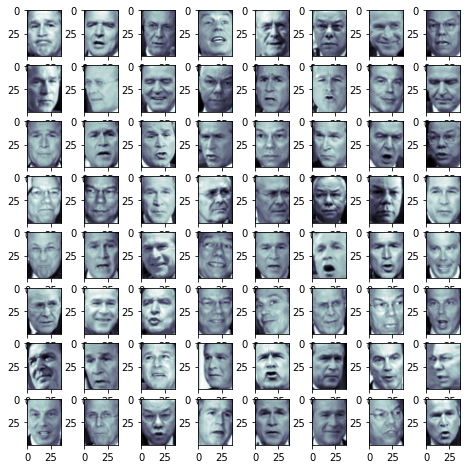

In [7]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [8]:
x,y = lfw.data,lfw.target
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [9]:
x = lfw.data
y = lfw.target

In [10]:
x_train.shape
x_test.shape

(285, 1850)

In [11]:
lfw.images.shape

(1140, 50, 37)

In [12]:
pca = PCA()
pca.fit(x_train)

PCA()

In [13]:
pca.components_.shape

(855, 1850)

In [14]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.99:
    currentSum += pca.explained_variance_[k]
    k +=1
k

317

In [15]:
pca = PCA(n_components=k, whiten =True)
transformed_data = pca.fit_transform(x_train)
transformed_data.shape

(855, 317)

In [16]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(855, 1850)

In [17]:
x_approx_images = x_approx.reshape((855,50,37))

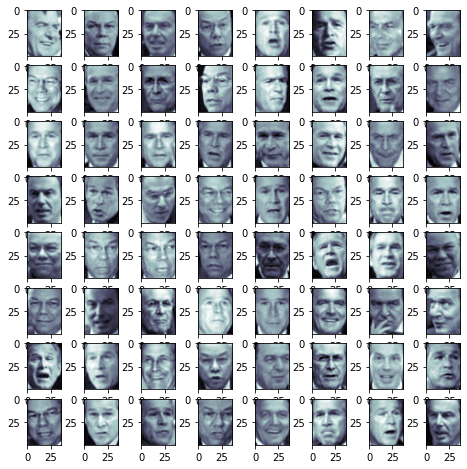

In [18]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [19]:
eigenv = pca.components_
eigenv.shape

(317, 1850)

In [20]:
eigen_faces = eigenv.reshape((317,50,37))

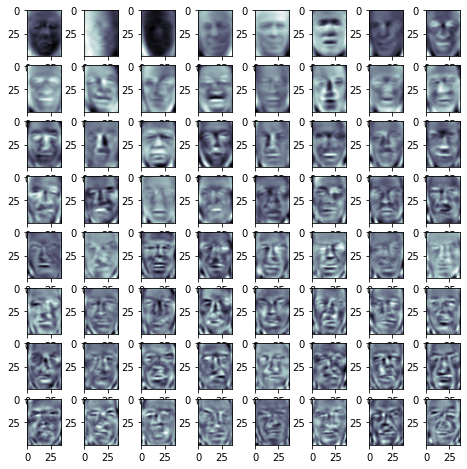

In [21]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigen_faces[i],cmap=plt.cm.bone)
plt.show()

In [22]:
x_train_pca = transformed_data
x_test_pca = pca.transform(x_test)

In [23]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.4841477870941162
              precision    recall  f1-score   support

           0       0.80      0.66      0.72        65
           1       0.75      0.38      0.50        24
           2       0.61      0.96      0.74       128
           3       0.80      0.13      0.23        30
           4       1.00      0.29      0.45        38

    accuracy                           0.67       285
   macro avg       0.79      0.48      0.53       285
weighted avg       0.73      0.67      0.62       285

[[ 43   1  21   0   0]
 [  0   9  15   0   0]
 [  4   1 123   0   0]
 [  2   0  24   4   0]
 [  5   1  20   1  11]]


In [26]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7394959926605225
              precision    recall  f1-score   support

           0       0.71      0.18      0.29        65
           1       1.00      0.12      0.22        24
           2       0.48      0.99      0.65       128
           3       0.00      0.00      0.00        30
           4       1.00      0.08      0.15        38

    accuracy                           0.51       285
   macro avg       0.64      0.28      0.26       285
weighted avg       0.60      0.51      0.40       285

[[ 12   0  53   0   0]
 [  0   3  21   0   0]
 [  1   0 127   0   0]
 [  2   0  28   0   0]
 [  2   0  33   0   3]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.